# exam2 due 5p Fri Mar 12 2021

This assignment will be graded on both participation and correctness (1 point each, for a total of 2 points for each sub-problem).

***You are welcome (and encouraged) to:***
* use analytical and numerical computational tools -- specify the tool(s) in sourcecode and/or text;
* reuse example sourcecode and other materials provided in this course;
consult textbooks, websites, and other publicly-available materials -- include full citation(s) with the URL and/or DOI (Links to an external site.).

***You are not permitted to discuss the exam problems or share any part of your solutions with anyone other than the Prof.***

* By submitting your exam solution on Canvas, you are affirming your understanding of and adherence to these restrictions.
* The Prof will be available to answer questions during Zoom time in each exam week.
* The Prof will also answer questions posted to the Canvas Discussion board until 5p Fri in the exam week.

Submit your homework writeup by uploading a .pdf and/or .ipynb on the Canvas Assignment.

You are welcome (and encouraged) to typeset your homework assignments rather than write them by hand.  While you could do this with LaTeX, you may find it easier to use the Colaboratory Notebook, since it is adept at embedding equations (via LaTeX syntax), matrix computations, and control system calculations.



16.0 <= scores <= 22.0
median score = 19.0


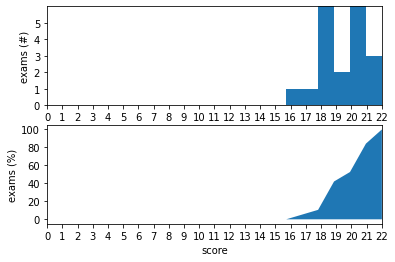

In [3]:
import numpy as np
import pylab as plt

scores = np.array([16. , 17.5, 18. , 18. , 18. , 18. , 18. , 18.5, 19. , 19. , 20. ,
                   20. , 20. , 20. , 20. , 20.5, 22. , 22. , 22.])

print('%0.1f <= scores <= %0.1f'%(scores.min(),scores.max()))
print('median score = %0.1f'%np.median(scores))

xlim = (0,22)
dxlim = xlim[1] - xlim[0]

plt.figure()
plt.subplot(2,1,1)
h = plt.hist(scores,bins=np.linspace(xlim[0],xlim[1],dxlim))
n,s = h[0],h[1]
N = int(np.ceil(h[0].max()))
plt.ylim(0,N)
plt.xticks(np.linspace(xlim[0],xlim[1],dxlim+1))
plt.yticks(np.arange(0,N))
plt.xlim(xlim)
plt.ylabel('exams (#)');

plt.subplot(2,1,2)
n *= 100./n.sum()
n = np.hstack((0.,n))
plt.fill_between(s,np.cumsum(n),0*n)
plt.xlim(xlim)
plt.xticks(np.linspace(xlim[0],xlim[1],dxlim+1))
plt.yticks(np.linspace(0,100,6))
plt.xlabel('score'); plt.ylabel('exams (%)');

# 0. Prof Burden; he/him/his

a. Approximately how many hours did you spend on this assignment?

***Answer:*** $\approx 30$min

b. Were there specific problems that took much longer than others?

***Answer:*** n/a

c. What class meeting(s) did you participate in this week?

***Answer:*** all :)

d. What timezone(s) were you working in this week?

***Answer:*** Seattle time


# 1. controllability

Consider (CT-LTI-DE)

$$ \dot{x} = A x + B u,\ x\in\mathbb{R}^n,\ u\in\mathbb{R}^k, $$

and suppose $(A,B)$ is controllable.

(a.) Prove or disprove (e.g. provide a counterexample):  given $\xi\in\mathbb{R}^n$ there exists a control input $\mu:[0,\infty)\rightarrow\mathbb{R}^k$ and a time $\tau > 0$ such that $x(t) = \xi$ for all $t \geq \tau$ (assume $x(0) = 0$), i.e.

$$ \forall \xi\in\mathbb{R}^n : \exists \tau > 0, (\mu:[0,\infty)\rightarrow\mathbb{R}^k) : \forall t \geq \tau : x(t) = \xi. $$

***Solution (disprove by counter-example):*** controllability ensures we can find an input $\mu$ that steers the origin to $\xi$ ***at*** time $\tau$, but it is only possible to keep the state at $\xi$ ***after*** time $\tau$ if $\xi$ can be made an equilibrium, i.e. only if there exists $\mu_0$ such that $A \xi + B \mu_0 = 0$.

As a counter-example, consider a double integrator $\ddot{y} = u$ -- this system is controllable, but the state $(y,\dot{y})$ cannot be held constant if $\dot{y} \neq 0$.



(b.) Prove or disprove (e.g. provide a counterexample):  there exists $K\in\mathbb{R}^{k\times n}$ and time $\tau > 0$ such that full-state feedback $u = - K x$ yields $x(\tau) = 0$ for all $x(0)\in\mathbb{R}^n$.

$$ \exists \tau > 0, K\in\mathbb{R}^{k\times n} : \forall x(0)\in\mathbb{R}^n : u = - K x \implies x(\tau) = 0. $$

***Solution (disprove by counter-argument):*** controllability ensures we can find $K$ such that the state converges ***asymptotically*** to the origin, i.e. $\lim_{t\rightarrow\infty} x(t) = 0$ for all initial conditions $x(0)$, but it is not possible to take non-zero initial conditions to the origin in finite time using linear state feedback.

To see this, note that $u = - K x$ yields $x(t) = e^{(A - BK) t} x(0)$, and $e^{(A - BK) t}$ is invertible for all $A$, $B$, $K$, and $t < \infty$, so the only initial condition that yields $x(t) = 0$ is $x(0) = 0$.

# 2. observability

Given LTV-DE

$$ \dot{x} = A(t) x + B(t) u,\ x\in\mathbb{R}^n,\ u\in\mathbb{R}^k, $$

$$ y = C(t) x + D(t) u,\ y\in\mathbb{R}^m, $$

and times $t_0 < t_1$, 
recall the definition of the ***reachable subspace*** $\mathcal{R}[t_0,t_1]$ from Lecture 04a,
and define the ***output-reachable subspace*** $\mathcal{S}[t_0,t_1]\subset\mathbb{R}^m$ by

$$ \mathcal{S}[t_0,t_1] = \left\{ C(t_1)\int_{t_0}^{t_1} \Phi(t_1,\tau) B(\tau) u(\tau) d\tau + D(t_1) u(t_1) \mid u:[t_0,t_1]\rightarrow\mathbb{R}^k \right\}. $$

We say (LTV-DE) is:
* ***reachable on $[t_0,t_1]$*** if $\mathcal{R}[t_0,t_1] = \mathbb{R}^n$;
* ***output-reachable on $[t_0,t_1]$*** if $\mathcal{S}[t_0,t_1] = \mathbb{R}^m$.

(a.) Prove or disprove (e.g. provide a counterexample): if (LTV-DE) is reachable then it is output-reachable.

***Solution (disprove by counterexample):*** if $C(t_1) = 0$, $D(t_1) = 0$ then (LTV-DE) is not output-reachable on $[t_0,t_1]$ regardless of whether it is reachable on $[t_0,t_1]$.



(b.) Prove or disprove (e.g. provide a counterexample): if (LTV-DE) is output-reachable then it is reachable.

***Solution (disprove by counterexample):*** if $D(t_1)$ is square and invertible then (LTV-DE) is output-reachable on $[t_0,t_1]$ regardless of whether it is reachable on $[t_0,t_1]$.



# 3. closing the loop

Consider (LTI-DE)

$$ \dot{x}/x^+ = A x + B u,\ x\in\mathbb{R}^n,\ u\in\mathbb{R}^k, $$

$$ y = C x + D u,\ y\in\mathbb{R}^m, $$

and suppose $(A,B)$ controllable, $(A,C)$ observable.

(a.) Prove or disprove (e.g. provide a counterexample):  for all $K\in\mathbb{R}^{k\times n}$, $(A - B K, B)$ is controllable.

***Solution (prove using controllability matrix):*** the controllability matrix for the pair $(A - B K, B)$ has the form

$$ \mathcal{C}_{(A - BK,B)} = \left[\begin{array}{cccccc} B & (A - B K) B & (A - B K)^2 B & \cdots & (A - B K)^{n-1} B \end{array}\right]. $$

Note that $(A - B K) B = A B - B K B$, so the first two blocks of columns in $\mathcal{C}_{(A - BK,B)}$ span the same subspace as the first two blocks of columns in $\mathcal{C}_{(A,B)}$:

$$ \operatorname{span} \left[\begin{array}{cc} B & (A - B K) B \end{array}\right] = \operatorname{span} \left[\begin{array}{cc} B & A B \end{array}\right]. $$

Similarly, since $(A - B K)^2 B = (A - B K) (A B - B K B) = A^2 B - A B K B - B K A B + B K B K B$, the first three blocks of columns in $\mathcal{C}_{(A - BK,B)}$ span the same subspace as the first three blocks of columns in $\mathcal{C}_{(A,B)}$.

This pattern continues (*) up through the last blocks of columns of $\mathcal{C}_{(A - BK,B)}$ and $\mathcal{C}_{(A,B)}$, so we conclude

$$ \operatorname{span}\mathcal{C}_{(A - BK,B)} = \operatorname{span}\mathcal{C}_{(A,B)}. $$

But $\operatorname{span}\mathcal{C}_{(A,B)} = \mathbb{R}^n$ since $(A,B)$ controllable, so we conclude $\operatorname{span}\mathcal{C}_{(A - BK,B)} = \mathbb{R}^n$, i.e. $(A - BK,B)$ controllable.

(* A formal proof would proceed by induction -- noticing and stating the pattern was sufficient to receive full credit on this problem. *)



(b.) Prove or disprove (e.g. provide a counterexample):  for all $K\in\mathbb{R}^{k\times n}$, $(A - B K, C)$ is observable.

***Solution (disprove by counterexample):*** if $B K = A$, e.g. $B = I, K = A$, $(A - B K, C)$ is not observable.

# 4. MIMO systems

Consider the following block diagram involving a MIMO process $P$ and MIMO controller $C$ built from two MIMO subsystems (feedforward $F$ and feedback $B$):

![](https://docs.google.com/drawings/d/e/2PACX-1vR_Pnr7CfFqFJqAOeURp3SpJmx6C98NhNpU-c6vESPEizdQd2cjsBBsBEnUmGAzG-nNtuVoyTjRi4ae/pub?w=576&h=260)

(a.) Derive transfer matrices $T_{yr}$ and $T_{yd}$.

***Solution:*** transcribing the block diagram into equations, we have

$$ y = P (d + F r + B(r - y)) \iff y = (I + P B)^{-1} P d + (I + PB)^{-1}(P F + P B) r, $$

so $T_{yr} = (I + PB)^{-1}(P F + P B)$, $T_{yd} = (I + P B)^{-1} P$.



(b.) Determine necessary conditions on $C$ (i.e. on $F$ and $B$) and $P$ such that $T_{yr} = I$ (i.e. the transformation from $r$ to $y$ is the identity); be sure to carefully consider and explicitly state all assumptions.

***Solution:*** to have $T_{yr} = I$ it is necessary that $P$ is (right-)invertible and $P F = I$ (i.e. $F$ is a (right-)inverse for $P$).

(***Note:*** we only discussed the concept of invertibility for "square" systems (i.e. systems that have the same number of inputs as outputs), so it was sufficient to stipulate that $P$ is square, invertible, and $F = P^{-1}$ to receive full credit.)

# 5. computation

Consider the simplified vertical-plane quadrotor model
$$ M\ddot{\eta} = F\sin\theta, $$
$$ M\ddot{\nu} = -Mg + F\cos\theta, $$
$$ I\ddot{\theta} = \tau $$
where ($\eta$, $\nu$) denote the quadrotor (horizontal, vertical) position and $\theta$ denotes the quadrotor's rotation, ($M$, $I$) denote quadrotor (mass, inertia), $g$ is acceleration due to gravity, and ($F$, $\tau$) denote the net (thrust, torque) applied by the spinning rotors.

With $q = (\eta,\nu,\theta)\in\mathbb{R}^3$ denoting positions and $\dot{q} = \frac{d\ }{dt} q = (\dot{\eta},\dot{\nu},\dot{\theta})\in\mathbb{R}^3$ denoting velocities,
the state vector is $x = (q,\dot{q})\in\mathbb{R}^6$,
the input vector is $u = (F,\tau)\in\mathbb{R}^2$,
and the state-space model is
$$ \dot{x} = \frac{d}{dt}\left[\begin{array}{c} q \\ \dot{q} \end{array}\right] = \left[\begin{array}{c} \dot{q} \\ \ddot{q}(x,u) \end{array}\right] = f(x,u), $$
where $\ddot{q} : \mathbb{R}^6 \times \mathbb{R}^2 \rightarrow \mathbb{R}^3$ is defined by 
$$\ddot{q}(x,u) = \left[\begin{array}{c} \frac{F}{M}\sin\theta \\ -g + \frac{F}{M}\cos\theta \\ \frac{\tau}{I}\end{array}\right].$$ 

Finally, suppose the planar position (but not rotation) of the quadrotor is measured:

$$ y = h(x,u) = \left[\begin{array}{c} \eta \\ \nu \end{array}\right]. $$

Note that $\dot{q}_0 = 0$ (i.e. zero velocity) is an equilibrium with any position $q_0 = (\eta,\nu,0)$ when input $u = (Mg,0)$ (i.e. thrust balances force of gravity $Mg$ and torque is zero), so we'll consider one such equilibrium at height $\nu = 1$, i.e.  $q_0 = (0,1,0)$.



In both (a.) and (b.), provide simulation sourcecode and plots that illustrate convergence to equilibrium.  Helpful functions are provided below.

In [4]:
# "magic" commands, prefaced with "%", changes settings in the notebook

# this ensures plots are embedded in notebook web page
%matplotlib inline

# pdb = Python debugger, so this command turns the debugger OFF
%pdb off

Automatic pdb calling has been turned OFF


In [5]:
# numpy = numerical Python, implements arrays (/ matrices)
import numpy as np
# limit number of decimal places printed for floating-point numbers
np.set_printoptions(precision=3)

# scipy = scientific Python, implements operations on arrays / matrices
import scipy as sp
# linalg = linear algebra, implements eigenvalues, matrix inverse, etc
from scipy import linalg as la
# optimize = optimization, root finding, etc
from scipy import optimize as op

# produce matlab-style plots
import matplotlib as mpl
# increase font size on plots
mpl.rc('font',**{'size':18})
# use LaTeX to render symbols
mpl.rc('text',usetex=False)
# animation
from matplotlib import animation as ani
# Matlab-style plotting
import matplotlib.pyplot as plt

# symbolic computation, i.e. computer algebra (like Mathematica, Wolfram Alpha)
import sympy as sym


In [6]:
# os = operating system; access OS-level commands
# e.g. create directory, delete file, execute command
# (more platform-independent than "!")
import os

# test whether this is a Colaboratory or Jupyter notebook
try:
  import google.colab
  COLAB = True
  print('Colaboratory Notebook')
except:
  COLAB = False
  print('Jupyter Notebook')

# Colab notebook
if COLAB:
  # pip = Python package manager; "!" means "run at system level"
  !pip install control
  !pip install JSAnimation
  
  # render SymPy equations nicely in Colaboratory Notebook
  def colab_latex_printer(exp,**options):
    from google.colab.output._publish import javascript
    url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=default"
    javascript(url=url)
    return sym.printing.latex(exp,**options)
  
  sym.init_printing(use_latex="mathjax",latex_printer=colab_latex_printer)

# Jupyter notebook
else:
  init_printing(use_latex='mathjax')
    

# Python's Control Systems Toolbox
import control as ctrl

# SciPy module that implements many of the routines in ctrl
from scipy import signal as sig

# render animations in the notebook
from JSAnimation.IPython_display import display_animation

Colaboratory Notebook
     |████████████████████████████████| 348kB 8.4MB/s 
  Created wheel for control: filename=control-0.9.0-py2.py3-none-any.whl size=344920 sha256=92af5364560c062a6e402cdd747d3388dbef0ef0145e6381de6e63ec74874755
  Stored in directory: /root/.cache/pip/wheels/35/be/ee/081b68ca3e4b2d253fba2f7f7e51960373903fb7b6d13c5532
Successfully built control
  Created wheel for JSAnimation: filename=JSAnimation-0.1-cp37-none-any.whl size=11426 sha256=e37bbee9c2668e44c21fbe63da47506fe99727c2ab0dc8b24fa41add727dbbba
  Stored in directory: /root/.cache/pip/wheels/3c/c2/b2/b444dffc3eed9c78139288d301c4009a42c0dd061d3b62cead
Successfully built JSAnimation


In [7]:
def Jacobian(g,y,d=1e-4):
  """
  approximate derivative via finite-central-differences 

  input:
    g - function - g : R^n -> R^m
    y - n array
    (optional)
    d - scalar - finite differences displacement parameter

  output:
    Dg(y) - m x n - approximation of Jacobian of g at y
  """
  # given $g:\mathbb{R}^n\rightarrow\mathbb{R}^m$:
  # $$D_y g(y)e_j \approx \frac{1}{2\delta}(g(y+\delta e_j) - g(y - \delta e_j)),\ \delta\ll 1$$
  e = np.identity(len(y))
  Dyg = []
  for j in range(len(y)):
      Dyg.append((.5/d)*(g(y+d*e[j]) - g(y-d*e[j])))
  return np.array(Dyg).T

def numerical_simulation(f,t,x,t0=0.,dt=1e-4,ut=None,ux=None,utx=None,return_u=False):
  """
  simulate x' = f(x,u) 

  input:
    f : R x X x U --> X - vector field
      X - state space (must be vector space)
      U - control input set
    t - scalar - final simulation time
    x - initial condition; element of X

    (optional:)
    t0 - scalar - initial simulation time
    dt - scalar - stepsize parameter
    return_u - bool - whether to return u_

    (only one of:)
    ut : R --> U
    ux : X --> U
    utx : R x X --> U

  output:
    t_ - N array - time trajectory
    x_ - N x X array - state trajectory
    (if return_u:)
    u_ - N x U array - state trajectory
  """
  t_,x_,u_ = [t0],[x],[]
  
  inputs = sum([1 if u is not None else 0 for u in [ut,ux,utx]])
  assert inputs <= 1, "more than one of ut,ux,utx defined"

  if inputs == 0:
    assert not return_u, "no input supplied"
  else:
    if ut is not None:
      u = lambda t,x : ut(t)
    elif ux is not None:
      u = lambda t,x : ux(x)
    elif utx is not None:
      u = lambda t,x : utx(t,x)

  while t_[-1]+dt < t:
    if inputs == 0:
      _t,_x = t_[-1],x_[-1]
      dx = f(t_[-1],x_[-1]) * dt
    else:
      _t,_x,_u = t_[-1],x_[-1],u(t_[-1],x_[-1])
      dx = f(_t,_x,_u) * dt
      u_.append( _u )

    x_.append( _x + dx )
    t_.append( _t + dt )

  if return_u:
    return np.asarray(t_),np.asarray(x_),np.asarray(u_)
  else:
    return np.asarray(t_),np.asarray(x_)

In [8]:
import numpy as np

g,M,I = 9.81,1.,1. # m/sec^2, kg, kg m^2

def f(t,x,u):
    q,dq = x[:3],x[3:] # positions, velocities
    eta,nu,theta = q # horiz., vert., rotation
    F,tau = u # thrust, torque
    return np.hstack([dq,(F/M)*np.sin(theta),
                        -g + (F/M)*np.cos(theta),
                        tau/I])

def h(t,x,u):
    q,dq = x[:3],x[3:] # positions, velocities
    return q[:2]

In [9]:
q0 = np.array([0.,1.,0.])
dq0 = np.array([0.,0.,0.])
x0 = np.hstack((q0,dq0))
u0 = np.array([M*g,0.])
print('x0 =',x0,'\nf(x0) =',f(0.,x0,u0))

A = Jacobian(lambda x : f(0.,x,u0),x0)
B = Jacobian(lambda u : f(0.,x0,u),u0)
C = Jacobian(lambda x : h(0.,x,u0),x0)
D = Jacobian(lambda u : h(0.,x0,u),u0)

print('A =\n',A)
print('B =\n',B)
print('C =\n',C)
print('D =\n',D)

x0 = [0. 1. 0. 0. 0. 0.] 
f(x0) = [0. 0. 0. 0. 0. 0.]
A =
 [[0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.   1.  ]
 [0.   0.   9.81 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.  ]]
B =
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 1.]]
C =
 [[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]
D =
 [[0. 0.]
 [0. 0.]]


It is straightforward to confirm that the linearized system is controllable and observable:

In [10]:
Co = np.hstack((B,A@B,A@A@B,A@A@A@B))
np.linalg.matrix_rank(Co)

6

In [11]:
O = np.vstack((C,C@A,C@A@A,C@A@A@A))
np.linalg.matrix_rank(O)

6

(a.) Synthesize and implement an observer-based controller that stabilizes the (LTI-DE) obtained by linearizing the nonlinear system at $(q_0,\dot{q}_0)$.

***Solution:*** 



In [14]:
roots = np.array([-1.502+3.62j , -1.502-3.62j , -1.498+0.627j, -1.498-0.627j, -1.5  +1.5j  , -1.5  -1.5j  ])
K = ctrl.place(A,B,roots)

roots = np.array([-1.502+3.62j , -1.502-3.62j , -1.498+0.627j, -1.498-0.627j, -1.5  +1.5j  , -1.5  -1.5j  ])
L = ctrl.place(A.T,C.T,roots-5).T

print("A - BK stable ?",
      np.all(la.eigvals(A - B @ K).real < 0))

print("A - LC stable ?",
      np.all(la.eigvals(A - L @ C).real < 0))

A - BK stable ? True
A - LC stable ? True


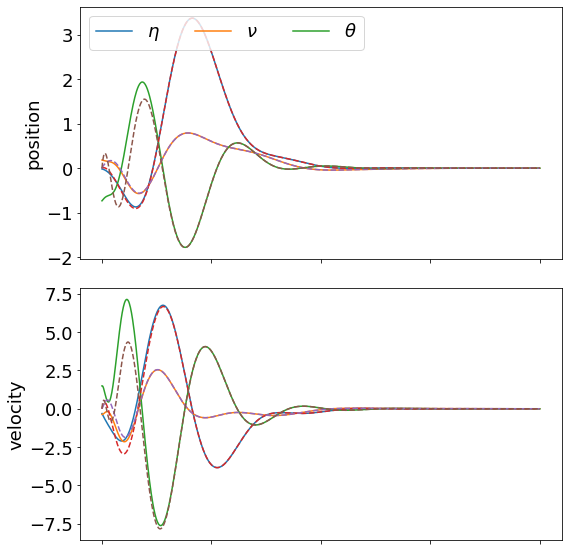

In [21]:
np.random.seed(50)

dt = 1e-2
t = 8. 
x = x0 + 3*(np.random.rand(6)-.5)
xhat = np.zeros(6)
x_xhat = np.hstack((x,xhat))

def linear(t,x_xhat):
  x,xhat = x_xhat[:6],x_xhat[6:]
  # input
  u = - K @ xhat
  # output
  y = C @ x + D @ u
  yhat = C @ xhat + D @ u
  # dynamics
  dx = A @ x + B @ u
  dxhat = A @ xhat + B @ u - L @ (yhat - y)
  dx_dxhat = np.hstack((dx,dxhat))
  return dx_dxhat

t_,x_xhat_ = numerical_simulation(linear,t,x_xhat,dt=dt)

x_ = x_xhat_[:,:6]
xhat_ = x_xhat_[:,6:]

fig = plt.figure(figsize=(8,8));

ax = plt.subplot(211)
ax.plot(t_,x_[:,:3],'-')
ax.plot(t_,xhat_[:,:3],'--')
ax.set_xticklabels([])
ax.set_ylabel('position')
ax.legend([r'$\eta$',r'$\nu$',r'$\theta$'],ncol=3,loc='upper left')

ax = plt.subplot(212)
ax.plot(t_,x_[:,3:],'-')
ax.plot(t_,xhat_[:,3:],'--')
ax.set_xticklabels([])
ax.set_ylabel('velocity')

plt.tight_layout();

(b.) Implement the controller from (a.) to stabilize the equilibrium $(q_0,\dot{q}_0)$ in the ***nonlinear*** system.

***Solution:*** 



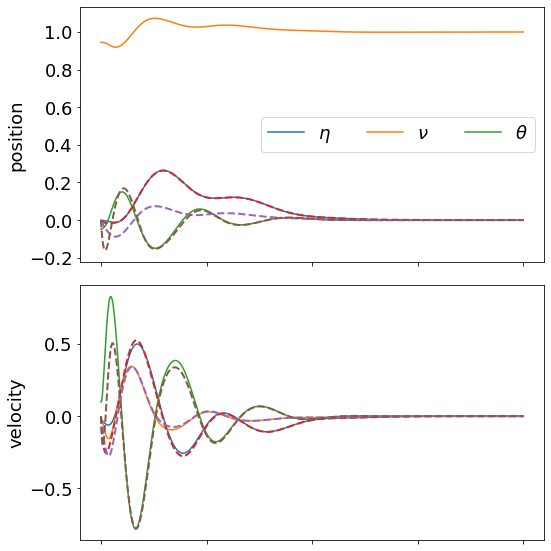

In [36]:
np.random.seed(50)

dt = 1e-2
t = 8. 
x = x0 + .2*(np.random.rand(6)-.5)
xhat = np.zeros(6)
x_xhat = np.hstack((x,xhat))

y0 = h(0.,x0,u0)

def nonlinear(t,x_xhat):
  x,xhat = x_xhat[:6],x_xhat[6:]
  # input
  u = - K @ xhat
  # output
  y = h(t,x,u)
  yhat = C @ xhat + D @ u
  # dynamics
  dx = f(t,x,u + u0)
  dxhat = A @ xhat + B @ u - L @ (yhat - (y - y0))
  dx_dxhat = np.hstack((dx,dxhat))
  return dx_dxhat

t_,x_xhat_ = numerical_simulation(nonlinear,t,x_xhat,dt=dt)

x_ = x_xhat_[:,:6]
xhat_ = x_xhat_[:,6:]

fig = plt.figure(figsize=(8,8));

ax = plt.subplot(211)
ax.plot(t_,x_[:,:3],'-')
ax.plot(t_,xhat_[:,:3],'--',lw=2)
ax.set_xticklabels([])
ax.set_ylabel('position')
ax.legend([r'$\eta$',r'$\nu$',r'$\theta$'],ncol=3)

ax = plt.subplot(212)
ax.plot(t_,x_[:,3:],'-')
ax.plot(t_,xhat_[:,3:],'--',lw=2)
ax.set_xticklabels([])
ax.set_ylabel('velocity')

plt.tight_layout();